Import langsung dari website kaggle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/STT NF/Semester 3/Machine Learning/Praktikum Mandiri/Praktikum Mandiri 3"

Mounted at /content/drive


In [3]:
import pandas as pd

df = pd.read_csv(path + "/data/day.csv", sep=',')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
df1 = df[["season", "yr", "mnth", "weekday", "workingday", "weathersit",
          "temp", "atemp", "hum", "windspeed", "cnt"]].copy()

df1.head()

,season,yr,mnth,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,6,0,2,0.344167,0.363625,0.805833,0.160446,985
1,1,0,1,0,0,2,0.363478,0.353739,0.696087,0.248539,801
2,1,0,1,1,1,1,0.196364,0.189405,0.437273,0.248309,1349
3,1,0,1,2,1,1,0.200000,0.212122,0.590435,0.160296,1562
4,1,0,1,3,1,1,0.226957,0.229270,0.436957,0.186900,1600


In [17]:
# hitung matrix korelasi
corr_matrix = df1.corr()

print(corr_matrix)

              season        yr      mnth   weekday  workingday  weathersit  \
season      1.000000 -0.001844  0.831440 -0.003080    0.012485    0.019211   
yr         -0.001844  1.000000 -0.001792 -0.005461   -0.002013   -0.048727   
mnth        0.831440 -0.001792  1.000000  0.009509   -0.005901    0.043528   
weekday    -0.003080 -0.005461  0.009509  1.000000    0.035790    0.031087   
workingday  0.012485 -0.002013 -0.005901  0.035790    1.000000    0.061200   
weathersit  0.019211 -0.048727  0.043528  0.031087    0.061200    1.000000   
temp        0.334315  0.047604  0.220205 -0.000170    0.052660   -0.120602   
atemp       0.342876  0.046106  0.227459 -0.007537    0.052182   -0.121583   
hum         0.205445 -0.110651  0.222204 -0.052232    0.024327    0.591045   
windspeed  -0.229046 -0.011817 -0.207502  0.014282   -0.018796    0.039511   
cnt         0.406100  0.566710  0.279977  0.067443    0.061156   -0.297391   

                temp     atemp       hum  windspeed       cnt  

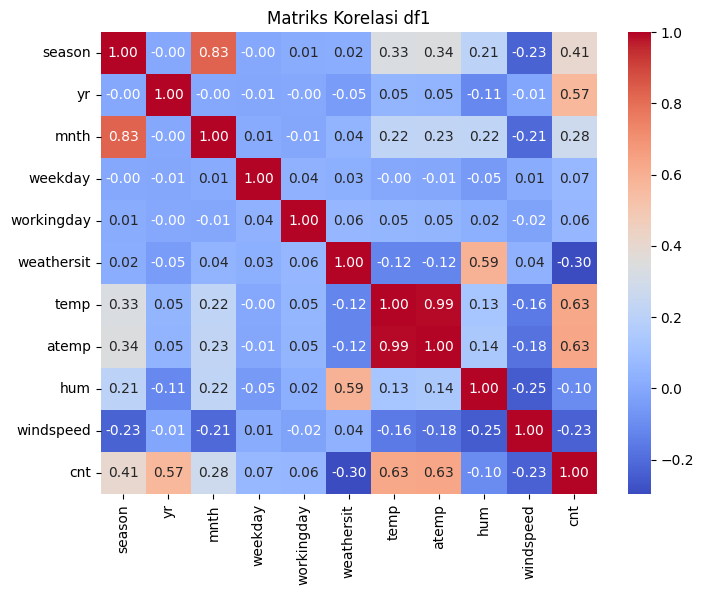

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Buat heatmap grafik
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi df1")
# Tampilkan grafik
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

y = df["cnt"]
X = df[["temp", "hum", "windspeed"]]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train :", len(X_train))
print("Jumlah data test  :", len(X_test))
print("Jumlah label train:", len(y_train))
print("Jumlah label test :", len(y_test))

X_train.head()

Jumlah data train : 584
Jumlah data test  : 147
Jumlah label train: 584
Jumlah label test : 147


,temp,hum,windspeed
682,0.343333,0.662917,0.342046
250,0.633913,0.939565,0.192748
336,0.299167,0.612917,0.095783
260,0.507500,0.695000,0.178483
543,0.697500,0.360000,0.271775


In [28]:
import statsmodels.api as sm

X_train_const = sm.add_constant(X_train)
X_train_const.head()

,const,temp,hum,windspeed
682,1.0,0.343333,0.662917,0.342046
250,1.0,0.633913,0.939565,0.192748
336,1.0,0.299167,0.612917,0.095783
260,1.0,0.507500,0.695000,0.178483
543,1.0,0.697500,0.360000,0.271775


In [30]:
import statsmodels.api as sm

# Buat model OLS
model = sm.OLS(y_train, X_train_const).fit()
print('-----------------------------')
print(model.params)
print('-----------------------------')

const = model.params['const']
x1_temp = model.params['temp']
x2_hum = model.params['hum']
x3_windspeed = model.params['windspeed']

# print persamaan regresi
print(f"y = {const:.3f} + ({x1_temp:.3f})*temp + ({x2_hum:.3f})*hum + ({x3_windspeed:.3f})*windspeed")

-----------------------------
const        3947.751945
temp         6589.714925
hum         -2995.743977
windspeed   -4153.013878
dtype: float64
-----------------------------
y = 3947.752 + (6589.715)*temp + (-2995.744)*hum + (-4153.014)*windspeed


In [31]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     156.6
Date:                Sun, 12 Oct 2025   Prob (F-statistic):           2.36e-74
Time:                        07:00:34   Log-Likelihood:                -5068.8
No. Observations:                 584   AIC:                         1.015e+04
Df Residuals:                     580   BIC:                         1.016e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3947.7519    380.720     10.369      0.0

In [32]:
import numpy as np

# Tambahkan konstanta ke data uji
X_test_const = sm.add_constant(X_test)

# Prediksi jumlah peminjaman sepeda
y_pred_test = model.predict(X_test_const)

# Buat tabel hasil prediksi
hasil = pd.DataFrame({
    "Suhu (temp)": X_test["temp"].to_numpy(),
    "Kelembapan (hum)": X_test["hum"].to_numpy(),
    "Kecepatan Angin (windspeed)": X_test["windspeed"].to_numpy(),
    "Jumlah Aktual (cnt)": y_test.to_numpy(),
    "Jumlah Prediksi (cnt)": y_pred_test
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih Error (cnt)"] = hasil["Jumlah Prediksi (cnt)"] - hasil["Jumlah Aktual (cnt)"]

# 2) Akurasi per-baris (100 * (1 - |error|/aktual)), dibatasi 0–100
denom = hasil["Jumlah Aktual (cnt)"].replace(0, np.nan)  # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih Error (cnt)"].abs() / denom)).clip(lower=0, upper=1) * 100

# Tampilkan hasil
hasil.head(10)

,Suhu (temp),Kelembapan (hum),Kecepatan Angin (windspeed),Jumlah Aktual (cnt),Jumlah Prediksi (cnt),Selisih Error (cnt),Akurasi (%)
703,0.475833,0.733750,0.174129,6606,4162.068470,-2443.931530,63.004367
33,0.186957,0.437826,0.277752,1550,2714.622765,1164.622765,24.863047
300,0.330833,0.585833,0.229479,3747,3419.811950,-327.188050,91.268000
456,0.425833,0.676250,0.172267,6041,4012.570915,-2028.429085,66.422296
633,0.550000,0.570000,0.236321,7538,4883.076694,-2654.923306,64.779473
557,0.716667,0.633333,0.151733,7264,6142.930396,-1121.069604,84.566773
39,0.134783,0.494783,0.188839,1605,2569.439312,964.439312,39.910323
356,0.373333,0.686250,0.274246,2209,3213.133239,1004.133239,54.543538
559,0.731667,0.485833,0.080850,7499,6978.026440,-520.973560,93.052760
514,0.722500,0.684583,0.295400,5743,5431.185280,-311.814720,94.570526
